# Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os
%matplotlib inline

In [2]:
import import_ipynb
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\python-code\\Modules')
except:
    os.chdir('C:\\Users\\llinc\\GitHub\\python-code\\Modules')
from time_shifted_PID import MIfunc
from time_shifted_PID import EqualState

importing Jupyter notebook from time_shifted_PID.ipynb


In [3]:
def ensure_dir(file_path):
    if not os.path.exists(file_path):
        os.makedirs(file_path)

# Main

In [5]:
exp_folder = 'D:\\GoogleDrive\\retina\\Troy\'s data\\20210930\\'
ensure_dir(exp_folder+'MI')
ensure_dir(exp_folder+'MI\\Fig')

merge_0224_HMM_RL_G4.5_5min_Q100_6.5mW.mat
merge_0224_HMM_UD_G4.5_5min_Q100_6.5mw.mat
merge_0224_HMM_UL_DR_G4.5_5min_Q100_6.5mW.mat
merge_0224_HMM_UR_DL_G4.5_5min_Q100_6.5mW.mat
merge_0928_LPOU_G4.5_0.5Hz_SW_hw8_long_RL_6.5v0mW.mat
merge_0928_LPOU_G4.5_1Hz_SW_hw8_long_RL_11v0.05mW.mat
merge_0928_LPOU_G4.5_1Hz_SW_hw8_long_RL_11v0.2mW.mat
merge_0928_LPOU_G4.5_1Hz_SW_hw8_long_RL_11v0mW.mat
merge_0928_LPOU_G4.5_1Hz_SW_hw8_long_RL_11v1mW.mat
merge_0928_LPOU_G4.5_1Hz_SW_hw8_long_RL_11v3mW.mat
merge_0928_LPOU_G4.5_1Hz_SW_hw8_long_RL_13v0mW.mat
merge_0928_LPOU_G4.5_1Hz_SW_hw8_long_RL_2v0.01mW.mat
merge_0928_LPOU_G4.5_1Hz_SW_hw8_long_RL_2v0.1mW.mat
merge_0928_LPOU_G4.5_1Hz_SW_hw8_long_RL_2v0.5mW.mat
merge_0928_LPOU_G4.5_1Hz_SW_hw8_long_RL_2v0mW.mat
merge_0928_LPOU_G4.5_1Hz_SW_hw8_long_RL_4v0mW.mat
merge_0928_LPOU_G4.5_1Hz_SW_hw8_long_RL_6.5v0.025mW.mat
merge_0928_LPOU_G4.5_1Hz_SW_hw8_long_RL_6.5v0.1mW.mat
merge_0928_LPOU_G4.5_1Hz_SW_hw8_long_RL_6.5v0.5mW.mat
merge_0928_LPOU_G4.5_1Hz_SW_hw8_long

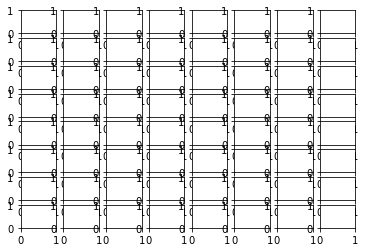

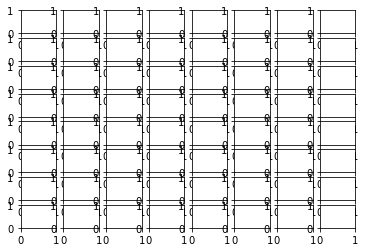

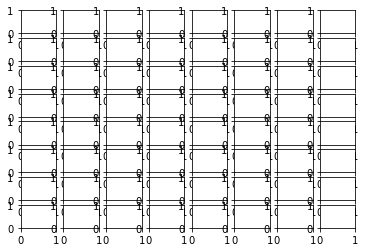

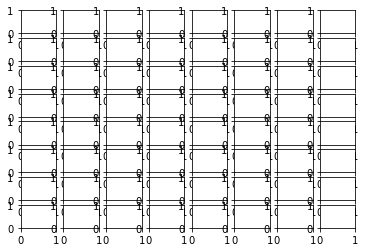

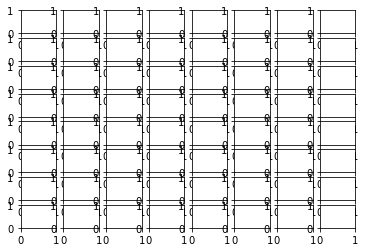

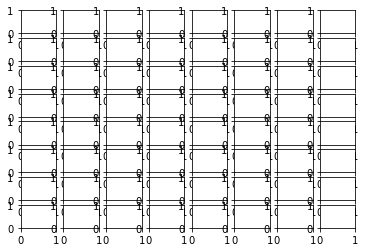

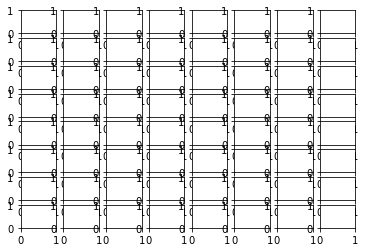

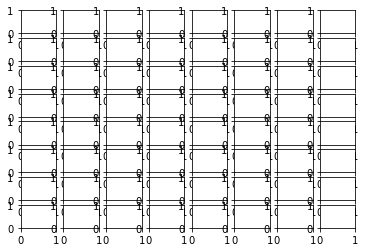

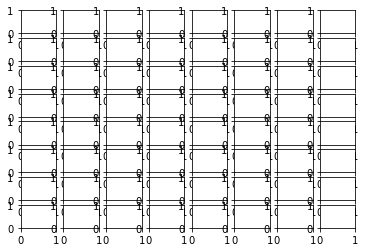

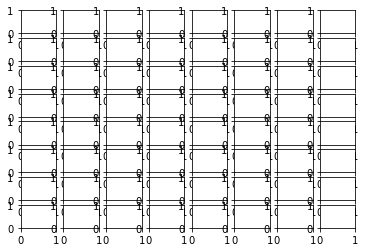

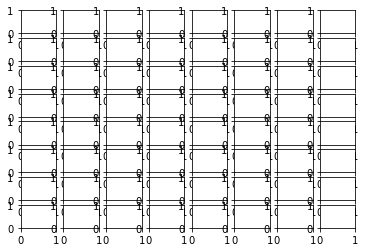

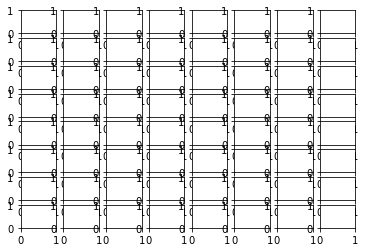

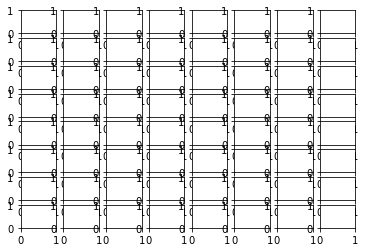

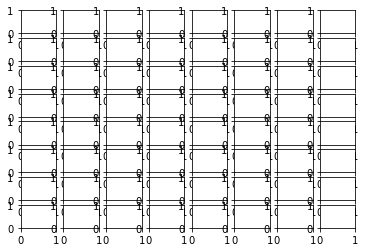

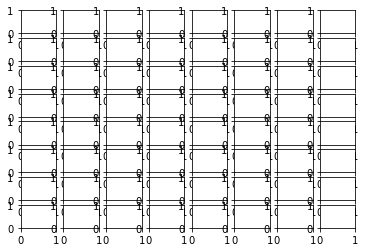

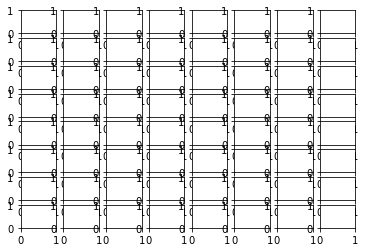

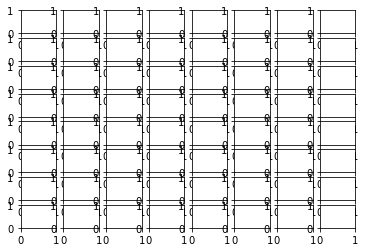

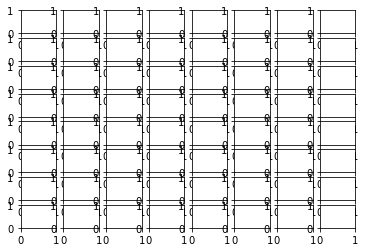

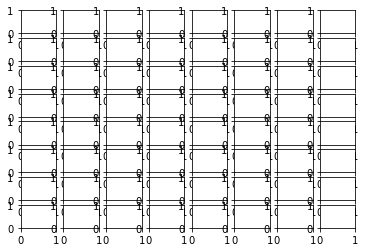

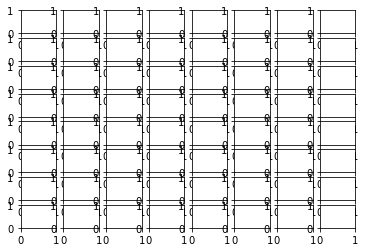

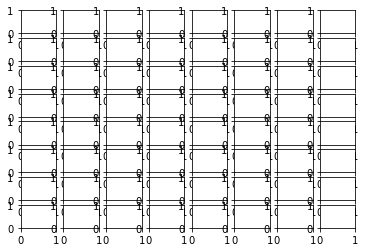

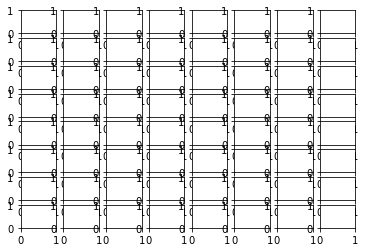

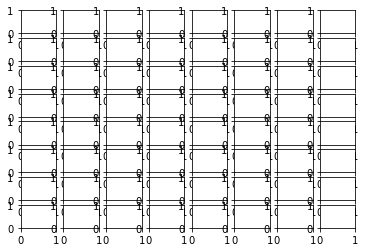

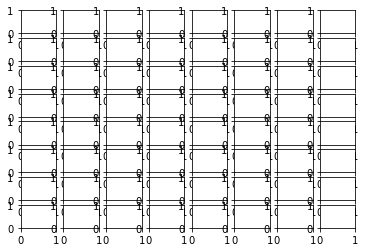

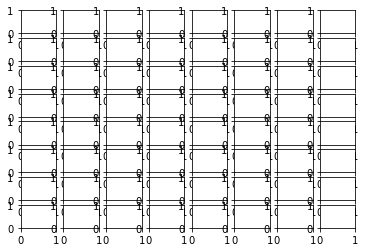

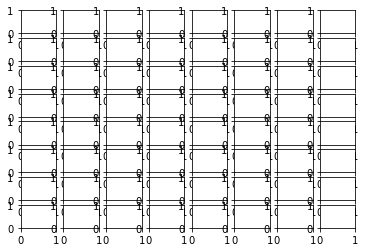

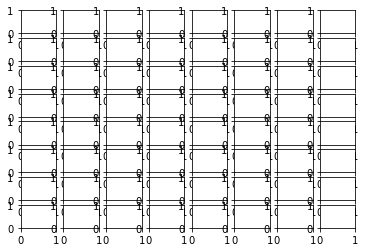

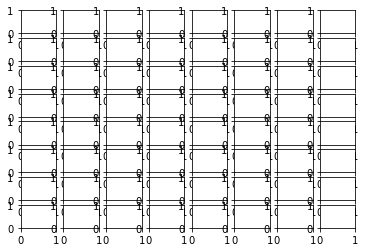

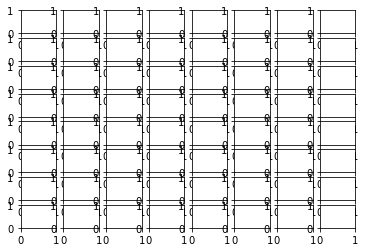

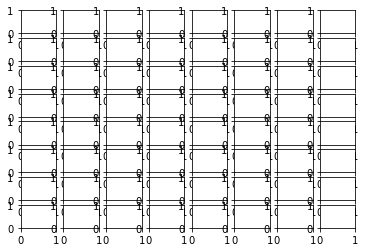

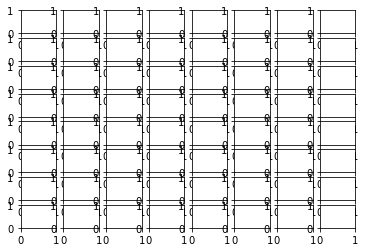

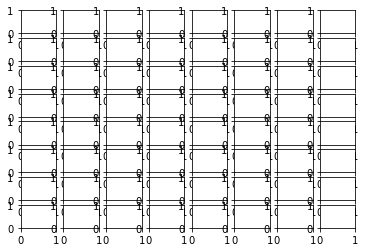

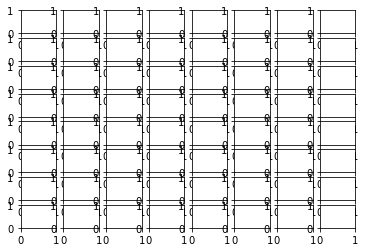

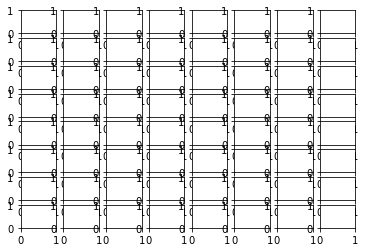

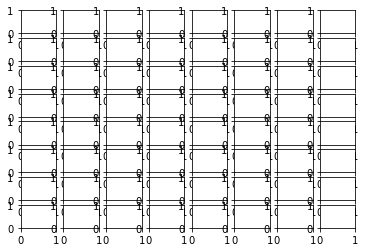

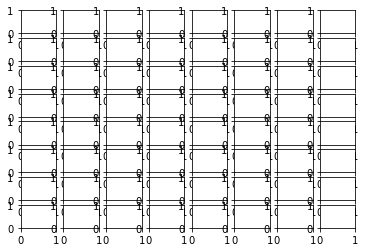

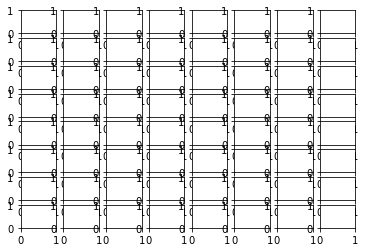

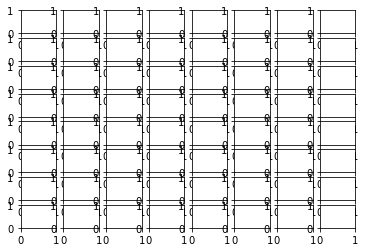

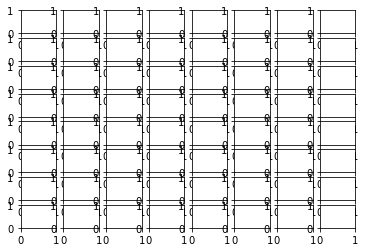

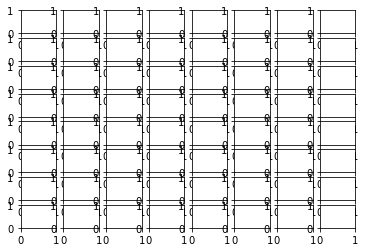

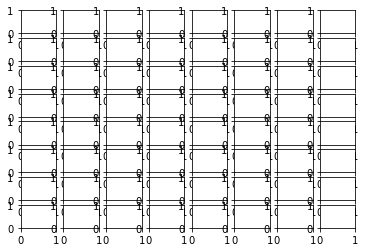

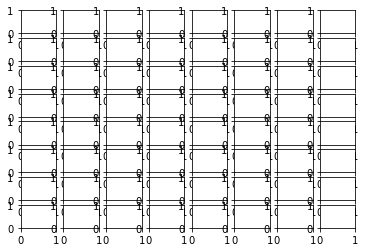

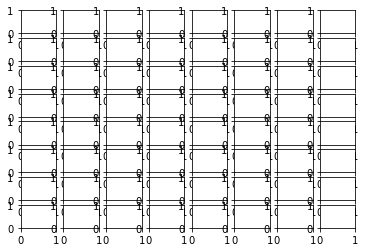

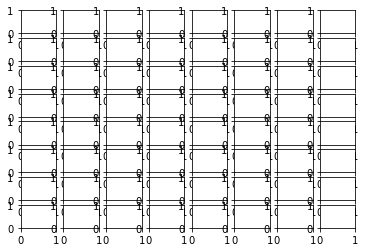

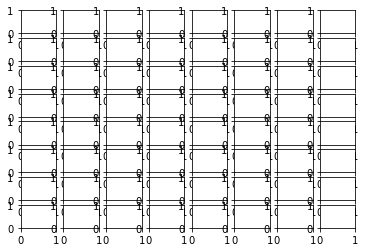

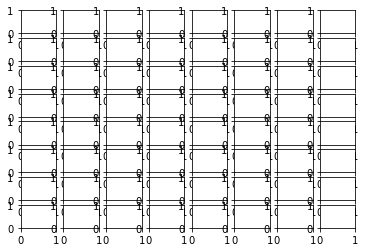

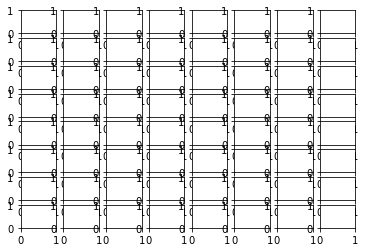

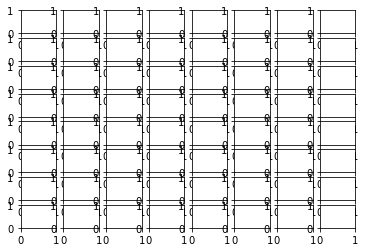

In [6]:
for filename in os.listdir(exp_folder+'merge\\'):
    if filename.find('HMM')==-1 and filename.find('OU')==-1:
        continue
#     elif filename.find('grating')==-1 and filename.find('GP')==-1:
#         continue
    print(filename)
    annots = loadmat(exp_folder+'merge\\'+filename)
#     if np.squeeze(annots['Video']['stimulation_type']) != 'Bar':
#         continue
#     elif np.squeeze(annots['Video']['series_type']) != 'HMM' and np.squeeze(annots['Video']['series_type']) != 'OUsmooth' and np.squeeze(annots['Video']['series_type']) != 'OU':
#         continue
#     if np.squeeze(annots['type']) != 'HMM' and np.squeeze(annots['type']) != 'OUsmooth' and np.squeeze(annots['type']) != 'OU':
#         continue
    
    x = np.squeeze(annots['bin_pos'])
    x = x.astype(float)
    x = (x-np.mean(x))/np.std(x)
    dt = 1./60.
    T=np.arange(len(x))*dt+dt

    xstate, _= EqualState(x, 6)
    Information_cell = [0]*60
    for channelnumber in np.arange(1,61):
        rstate, _ = np.histogram(annots['reconstruct_spikes'][0][channelnumber-1], np.append(0,T))
        if sum(rstate)/len(rstate)/dt <= 0.3 : continue

        window = [-1,1] # second
        timeshift, Information = MIfunc(rstate, xstate, dt, window, perSpike = True)
        Information_cell[channelnumber-1] = Information.copy()
    
    
    filename = filename[:-4]
    np.savez(exp_folder+'MI\\MIperSpike_'+filename+'.npz', Information_cell = Information_cell, timeshift = timeshift)